In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,silhouette_score
import os
import time
from tslearn_test_OD_years import TSA64K

In [2]:
# do clustering and print sillouttle score

method = 'euclidean'
dispatch_data = 'Example_dispatch_test.csv'
num_clusters = 40
selected_years = 10

tsa_task = TSA64K(dispatch_data, method,selected_years)
dispatch_array = tsa_task.read_data()
train_data = tsa_task.transform_data(dispatch_array)

sc,labels = tsa_task.cluster_data(train_data, num_clusters,save_index = True)
# print(sc)

C:\Users\JKLCh\Desktop\ND_PhD\Research\clustering\tslearn\onlydispatch_test\year_10\40_clusters_OD.json


In [3]:
# store the clustered data into dictionary cluster[label:dispatch_data]

clusters = {}
for i, j in enumerate(labels):
    if j not in clusters:
        clusters[j] = {}
        clusters[j]['dispatch'] = []
        clusters[j]['dispatch'].append(train_data[i])
    else:
        clusters[j]['dispatch'].append(train_data[i])

In [4]:
# read the representative day from json file

cluster_results = str(num_clusters) + '_clusters_OD.json'
path0 = os.getcwd()

# test on 1/10/100/1000 year data
path1 = f'year_{selected_years}'
path = os.path.join(path0,path1,cluster_results)

with open(path, 'r') as f:
    cluster_results = json.load(f)

cen = np.array(cluster_results['model_params']['cluster_centers_'])
time_len = range(24)

In [5]:
# make plots for the clustering results (representative day) and origin data. 

def plot_results(num):
    
    font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 18,
    }
    f,ax1 = plt.subplots(figsize = ((16,6)))
    for i in clusters[num]['dispatch']:
#         ax1.boxplot(i)
        ax1.plot(time_len,i,'--',c='g', alpha=0.3)
#     ax1.set_ylim(0,100)
    ax1.plot(time_len,cen[num], '-',c = 'r')
    ax1.set_ylabel('Dispatched Power(MW)',font = font1)
    ax1.set_xlabel('Time(h)',font = font1)
    plt.title('Cluster_'+str(num))
    plt.show()

    return print('The number of days in the cluster_{} is {}'.format(num,len(clusters[num]['dispatch'])))

In [31]:
# Calculate the capacity factor

capf_dict = {}
capf_whole_list = []

for keys in sorted(clusters.keys()):
# for keys in clusters.keys():
    capf_list = []
    for data in clusters[keys]['dispatch']:
        pmax = 1
        capf = float(sum(data)/(pmax*len(data)))
        capf_list.append(capf)
    capf_dict[keys] = capf_list
#     capf_whole_list.append(np.array(capf_list))
capf_value_sort_dict = sorted(capf_dict.items(),key = lambda x:x[1],reverse = True)
# capf_value_sort_dict
for keys,values in capf_value_sort_dict:
    capf_whole_list.append(values)

In [32]:
total_days = selected_years*364
length_sort = {}
for i in clusters:
    length_sort[f'cluster_{i}'] = len(clusters[i]['dispatch'])
sorted_result = sorted(length_sort.items(),key = lambda x:x[1],reverse = True)

for item in sorted_result:
    print(f'{item[0]} : {np.round(item[1]/total_days,4)}')

cluster_3 : 0.2673
cluster_0 : 0.0448
cluster_21 : 0.0426
cluster_7 : 0.0401
cluster_13 : 0.0376
cluster_24 : 0.0376
cluster_12 : 0.0371
cluster_10 : 0.0368
cluster_30 : 0.0352
cluster_17 : 0.0338
cluster_28 : 0.0299
cluster_8 : 0.0294
cluster_33 : 0.028
cluster_5 : 0.0266
cluster_31 : 0.0245
cluster_2 : 0.0212
cluster_11 : 0.0187
cluster_1 : 0.0184
cluster_25 : 0.0165
cluster_26 : 0.0124
cluster_20 : 0.0121
cluster_19 : 0.0121
cluster_16 : 0.0115
cluster_18 : 0.0115
cluster_22 : 0.0115
cluster_15 : 0.0107
cluster_27 : 0.0099
cluster_23 : 0.0091
cluster_9 : 0.0088
cluster_29 : 0.0088
cluster_34 : 0.0082
cluster_36 : 0.008
cluster_4 : 0.0077
cluster_14 : 0.0066
cluster_39 : 0.0058
cluster_6 : 0.0055
cluster_35 : 0.0055
cluster_32 : 0.0027
cluster_37 : 0.0027
cluster_38 : 0.0027


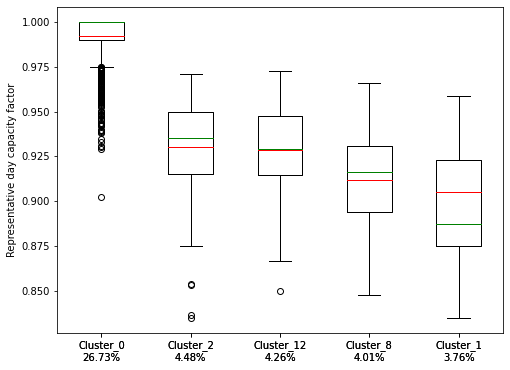

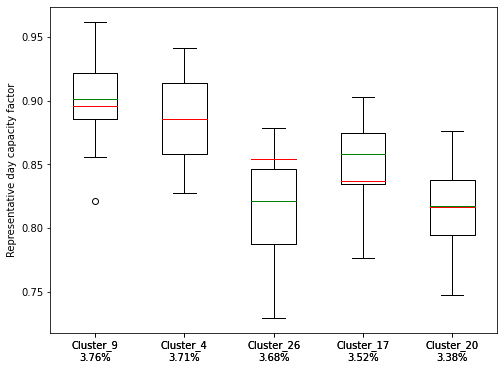

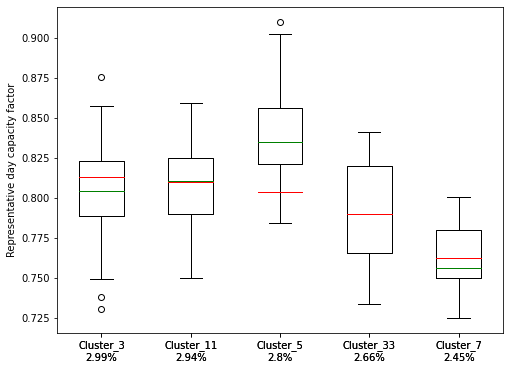

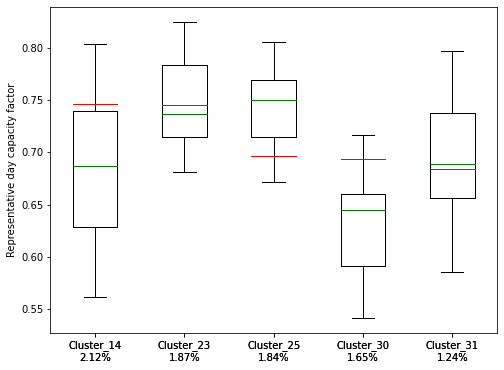

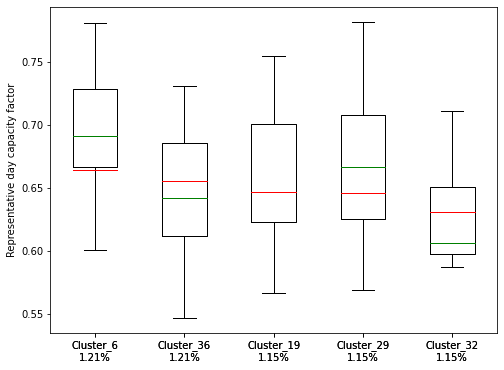

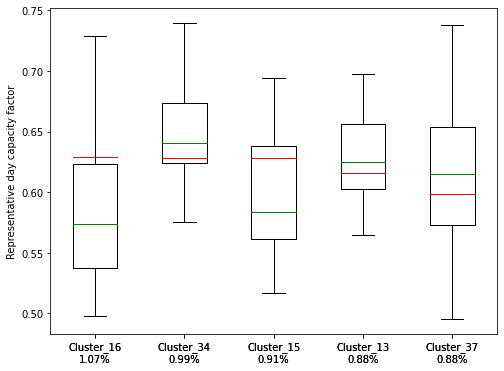

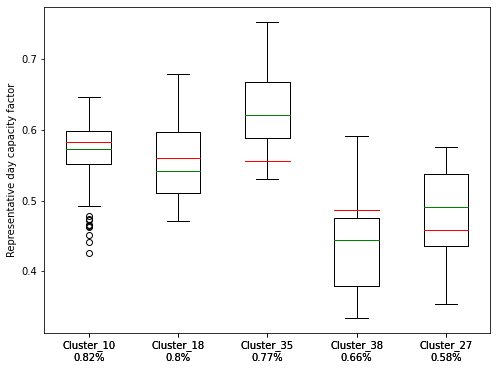

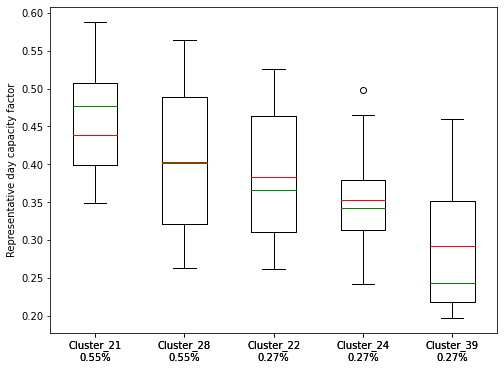

In [39]:
# make the box plot

cen_dict = {}
cen_list = []
for num, rd in enumerate(cen):
    cen_factor = sum(rd)/(len(rd)*pmax)
    cen_dict[num] = cen_factor

cen_plot = sorted(cen_dict.items(), key = lambda x:x[1], reverse = True)
for keys, values in cen_plot:
    cen_list.append(values)

length = 0
for cluster in capf_whole_list:
    length += len(cluster)

num_pts_in_clusters = {}
num_pts_in_clusters_list = []
for day,cluster in enumerate(capf_whole_list):
    num_pts_in_clusters[f'Cluster_{day}'] = np.round(len(cluster)/length,4)
num_pts_in_clusters_plot = sorted(num_pts_in_clusters.items(), key = lambda x:x[1], reverse = True)
for keys, values in num_pts_in_clusters_plot:
    num_pts_in_clusters_list.append(f'{keys}\n{np.round(values*100,4)}%')

pic_num = int(num_clusters/5)
for i in range(pic_num):
    f,ax = plt.subplots(figsize = (8,6))
    # red line is the representative day, green line is the median of the origan data in this cluster.
    ax.boxplot(capf_whole_list[i*5:(i+1)*5],labels = num_pts_in_clusters_list[i*5:(i+1)*5],medianprops = {'color':'g'},)
    ax.boxplot(cen_list[i*5:(i+1)*5],labels = num_pts_in_clusters_list[i*5:(i+1)*5],medianprops = {'color':'r'},)
    ax.set_ylabel('Representative day capacity factor')
plt.show()


cluster 0,  median:0.9292,   representative day:[0.9288]
cluster 1,  median:0.5738,   representative day:[0.583]
cluster 2,  median:0.7562,   representative day:[0.7625]
cluster 3,  median:1.0,   representative day:[0.9923]
cluster 4,  median:0.4773,   representative day:[0.4587]
cluster 5,  median:0.4439,   representative day:[0.4394]
cluster 6,  median:0.6423,   representative day:[0.6464]
cluster 7,  median:0.8583,   representative day:[0.8546]
cluster 8,  median:0.8104,   representative day:[0.8098]
cluster 9,  median:0.7899,   representative day:[0.7904]
cluster 10,  median:0.6406,   representative day:[0.647]
cluster 11,  median:0.6667,   representative day:[0.6647]
cluster 12,  median:0.887,   representative day:[0.8956]
cluster 13,  median:0.8174,   representative day:[0.817]
cluster 14,  median:0.3423,   representative day:[0.3527]
cluster 15,  median:0.737,   representative day:[0.7452]
cluster 16,  median:0.6148,   representative day:[0.6157]
cluster 17,  median:0.6914,   re

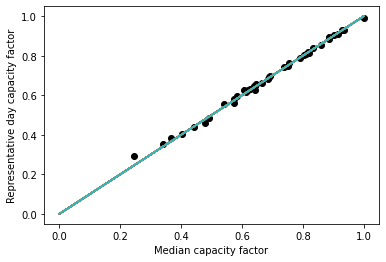

In [21]:
# print median capacity factor in each cluster and the representative day. 
x = np.linspace(0,1)
y = x
for i,j in enumerate(capf_whole_list):
    print(f'cluster {i},  median:{np.round(np.median(j),4)},   representative day:{np.round(cen_list[i],4)}')
    plt.scatter(np.round(np.median(j),4), np.round(cen_list[i],4),c='k')
    plt.plot(x,y)
    plt.xlabel('Median capacity factor')
    plt.ylabel('Representative day capacity factor')

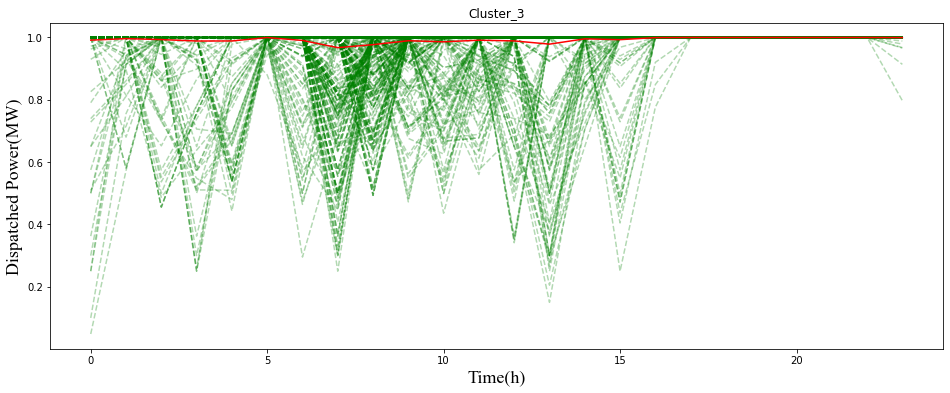

The number of days in the cluster_3 is 973


In [12]:
plot_results(3)

In [15]:
# capf_whole_list[1].sort()
mean = np.round(np.mean(capf_whole_list[3]),4)
median = np.round(np.median(capf_whole_list[3]),4)
std = np.round(np.std(capf_whole_list[3]),4)
print(f'The mean of cluster_3 is {mean},''\n'
f'the median of cluster_3 is {median},''\n'
f'the standard deviation of cluster_3 is {std}.')

The mean of cluster_3 is 0.9923,
the median of cluster_3 is 1.0,
the standard deviation of cluster_3 is 0.0144.
